In [1]:
import batman
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import scipy.optimize as spicy

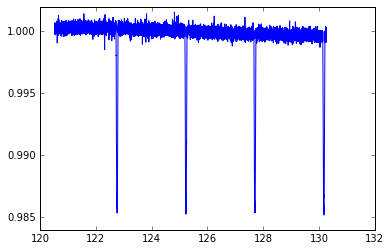

In [2]:
import astropy.io.ascii
table = astropy.io.ascii.read('kepler1b.txt')
time = table['time']
flux = table['flux']
nflux = flux/np.median(flux)
uncertainty = table['uncertainty']
plt.plot(time, nflux)
timepart = time[3000:3500]
fluxpart = nflux[3000:3500]
sigmapart = uncertainty[3000:3500]

In [3]:
def batmanCurveFit(xdata, t0, rp0):
    params = batman.TransitParams()
    params.t0 = t0                      #time of inferior conjunction
    params.per = 2.47061317              #orbital period
    params.rp = rp0                   #planet radius (in units of stellar radii)
    params.a = 7.903                     #semi-major axis (in units of stellar radii)
    params.inc = 83.872                  #orbital inclination (in degrees)
    params.ecc = 0.0                     #eccentricity
    params.w = 0.0                       #longitude of periastron (in degrees)
    params.u = [0.1, 0.3]                #limb darkening coefficients
    params.limb_dark = "quadratic"       #limb darkening model


    m = batman.TransitModel(params, xdata)
    flux = m.light_curve(params)
    return flux

[  1.22763315e+02   1.20392571e-01]


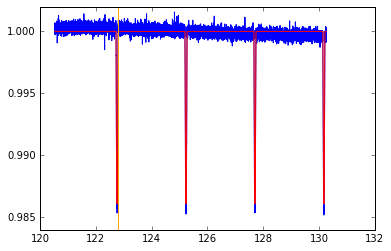

In [20]:
fitThis = spicy.curve_fit(batmanCurveFit, time, nflux, p0 = [122.7, 1.0], sigma = uncertainty)
xbest, ybest = fitThis[0]
print fitThis[0]
plt.plot(time, nflux)
plt.plot(time, batmanCurveFit(time, xbest, ybest), color = 'red')
plt.axvline(122.8, color = 'orange')

In [14]:
fitThis

(array([  1.22763315e+02,   1.20392568e-01]),
 array([[  1.12612901e-09,  -2.87699478e-13],
        [ -2.87699478e-13,   8.98768172e-09]]))